In [1]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [3]:
target1 = pd.read_csv('J082247.75+071154.7.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

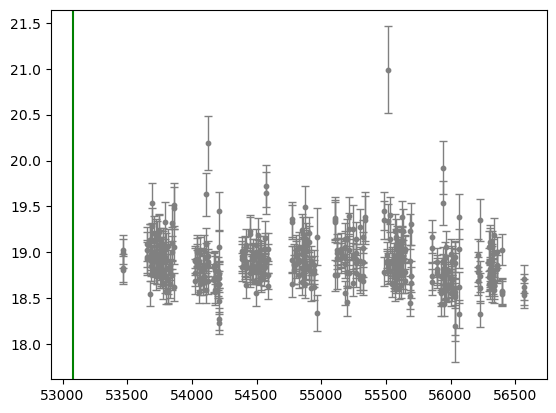

In [4]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x=53083 , color ='g')	
#plt.axvline(x= , color ='g')	

In [5]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

445

In [6]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.008060000000114087,
 0.008099999999103602,
 0.008159999997587875,
 185.27812000000267,
 0.004329999996116385,
 0.004310000003897585,
 0.00428999999712687,
 21.984629999999015,
 0.006540000002132729,
 0.006560000001627486,
 0.006620000000111759,
 7.004320000000007,
 0.004789999999047723,
 0.004789999999047723,
 0.004789999999047723,
 7.972690000002331,
 0.007530000002589077,
 0.007519999999203719,
 0.007529999995313119,
 14.894250000004831,
 0.006489999999757856,
 0.006479999996372499,
 7.003049999999348,
 0.007530000002589077,
 0.007590000001073349,
 0.007579999997687992,
 15.946869999999763,
 0.009440000001632143,
 0.009510000003501773,
 0.009519999999611173,
 5.949099999997998,
 0.008089999995718244,
 0.00810000000637956,
 0.008109999995213002,
 10.984580000003916,
 0.005299999997077975,
 0.005299999997077975,
 0.0052900000009685755,
 9.994870000002265,
 0.00789999999688007,
 0.007990000005520415,
 0.007910000000265427,
 6.864459999997052,
 0.006430000001273584,
 0.006450000000768

In [7]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

9


[3, 78, 131, 189, 237, 282, 349, 400, 440]

In [8]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[4, 75, 53, 58, 48, 45, 67, 51, 40, 5]

In [9]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [10]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
0,J082247.75+071154.7,1107045046923,19.03,0.16,125.69901,7.19889,53466.16111,0
1,J082247.75+071154.7,1107045046923,18.83,0.15,125.69901,7.19910,53466.16917,0
2,J082247.75+071154.7,1107045046923,18.99,0.16,125.69919,7.19888,53466.17727,0
3,J082247.75+071154.7,1107045046923,18.81,0.15,125.69900,7.19880,53466.18543,0
27,J082247.75+071154.7,1107045046923,19.03,0.19,125.69902,7.19877,53651.46355,0
...,...,...,...,...,...,...,...,...
440,J082247.75+071154.7,1107045046923,18.57,0.14,125.69894,7.19883,56397.15112,0
441,J082247.75+071154.7,1107045046923,18.62,0.14,125.69928,7.19884,56569.50178,0
442,J082247.75+071154.7,1107045046923,18.57,0.14,125.69933,7.19908,56569.50627,0
443,J082247.75+071154.7,1107045046923,18.53,0.14,125.69912,7.19887,56569.51075,0


In [11]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53466.18543

In [12]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

53858.1573

In [13]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54213.17

In [14]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54588.15405

In [15]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

54967.14084

In [16]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55337.15252

In [17]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55694.16287

In [18]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56062.14714

In [19]:
df_9 = data.iloc[seppt[7]+1:seppt[8],:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56397.15112

In [21]:
df_10 = data.iloc[seppt[8]+1:,:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

56569.51528

In [ ]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [22]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [23]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

In [ ]:


g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [24]:
med

[18.99,
 18.94,
 18.814999999999998,
 18.91,
 18.89,
 18.965,
 18.905,
 18.72,
 18.79,
 18.595]

In [25]:
centerMJD

[53466.169183333324,
 53751.82211891891,
 54119.2415523077,
 54493.86690982456,
 54862.108189574465,
 55217.128085,
 55588.126752575765,
 55967.467250999995,
 56307.576739230775,
 56569.50852]

In [26]:
medMJD


[53466.16917,
 53753.383734999996,
 54108.4516,
 54499.17051,
 54864.24782,
 55211.34662,
 55588.244770000005,
 55967.232495000004,
 56308.34314,
 56569.50851]

In [27]:
medopflux


[9.204495717531685e-05,
 9.638290236239665e-05,
 0.0001081445418623452,
 9.908319448927645e-05,
 0.00010092528860766793,
 9.41899584145837e-05,
 9.954159724463823e-05,
 0.00011803206356517371,
 0.00011066237839776675,
 0.00013246926269005105]

In [29]:
st = 53466
#start of observations

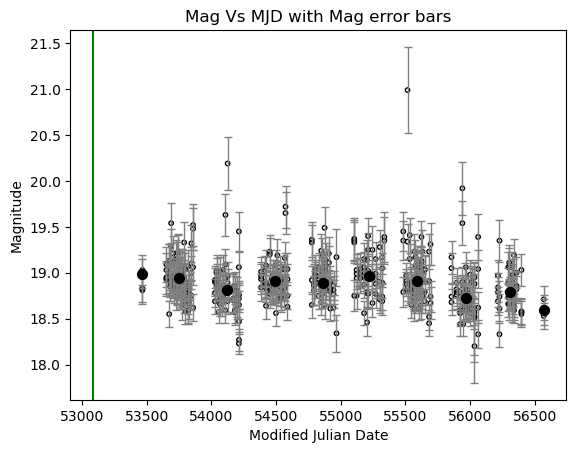

In [30]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x=53083  , color ='g')	
#plt.axvline(x=  , color ='g')	

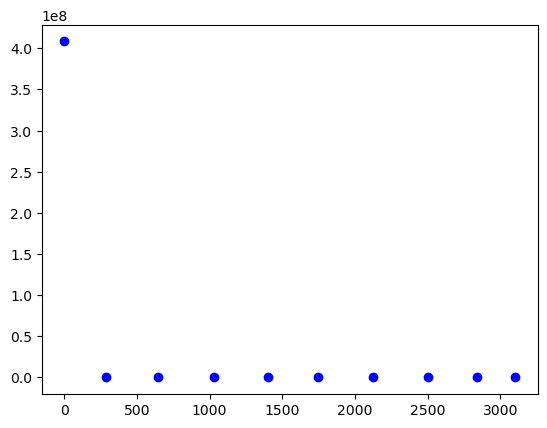

In [31]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [32]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [33]:
popt3

array([ 5.53896422e+02, -3.81080625e-05, -5.34910459e+02])

In [34]:
pcov3

array([[ 8.08185038e+12,  5.56071081e+05, -8.08185023e+12],
       [ 5.56071081e+05,  3.82604278e-02, -5.56071071e+05],
       [-8.08185023e+12, -5.56071071e+05,  8.08185008e+12]])

In [35]:
 np.sqrt(np.diag(pcov3))

array([2.84285954e+06, 1.95602729e-01, 2.84285949e+06])

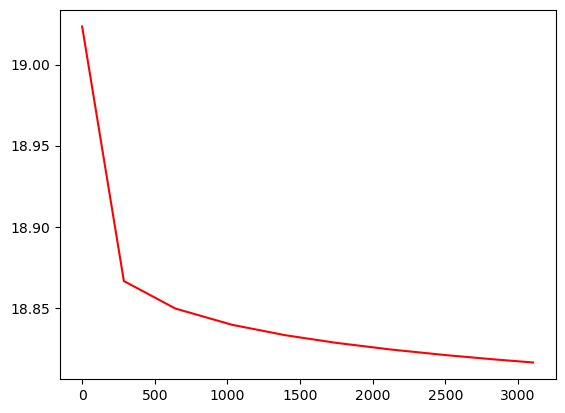

In [36]:
plt.plot(x, f(x,*popt3), 'r-')

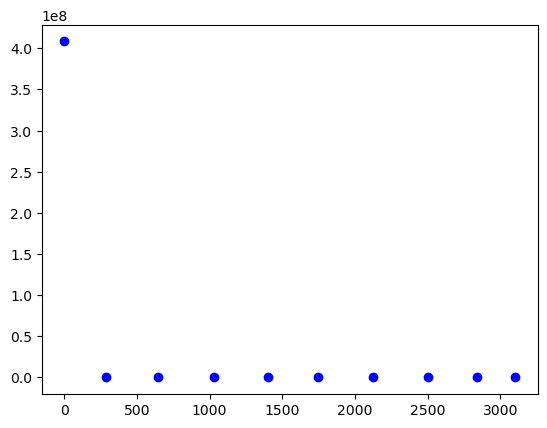

In [37]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [40]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag, maxfev =2000 )

In [41]:
popt4

array([-8.70131104e-23,  6.15904290e+00,  1.89306730e+01])

In [42]:
pcov4

array([[ 3.60991865e-42,  5.14118889e-21, -1.55497884e-23],
       [ 5.14118889e-21,  7.32278641e+00, -2.19533796e-02],
       [-1.55497884e-23, -2.19533796e-02,  2.61723372e-04]])

In [43]:
 np.sqrt(np.diag(pcov4))

array([1.89997859e-21, 2.70606475e+00, 1.61778667e-02])

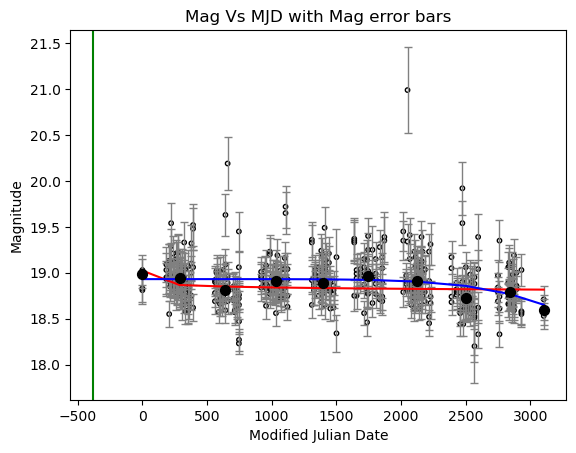

In [44]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 53083 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



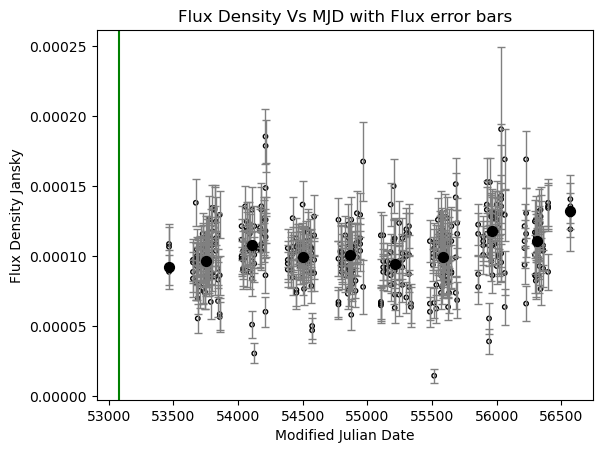

In [45]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x= 53083 , color ='g')	
#plt.axvline(x= , color ='g')

In [46]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [47]:
popt2

array([2.06642847e-24, 5.49517804e+00, 9.84401628e-05])

In [48]:
pcov2

array([[ 2.29582966e-45, -1.38459498e-22, -7.53146510e-29],
       [-1.38459498e-22,  8.35108082e+00,  4.50441395e-06],
       [-7.53146510e-29,  4.50441395e-06,  9.34461030e-12]])

In [49]:
 np.sqrt(np.diag(pcov2))

array([4.79148167e-23, 2.88982367e+00, 3.05689553e-06])

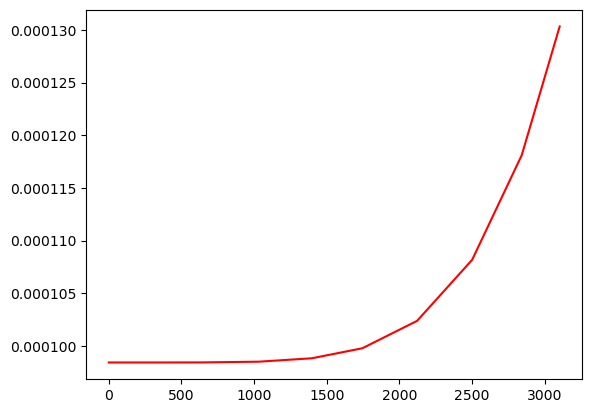

In [50]:
plt.plot(x, f(x,*popt2), 'r-')

In [51]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [52]:
popt1

array([-4.13137410e-02, -5.07572702e-05,  4.14017607e-02])

In [53]:
pcov1

array([[ 1.78983725e+04, -2.22587074e+01, -1.78983729e+04],
       [-2.22587074e+01,  2.76812914e-02,  2.22587078e+01],
       [-1.78983729e+04,  2.22587078e+01,  1.78983732e+04]])

In [54]:
 np.sqrt(np.diag(pcov1))

array([133.78479938,   0.16637696, 133.78480177])

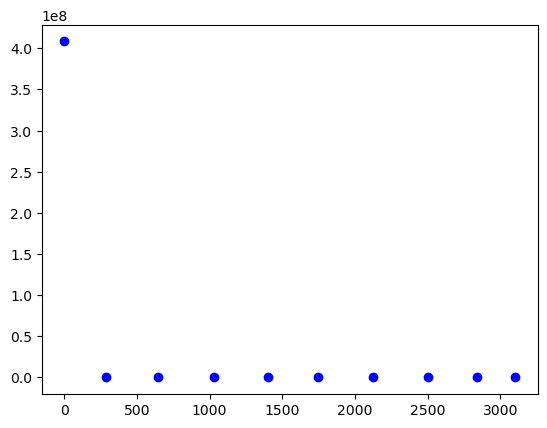

In [55]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


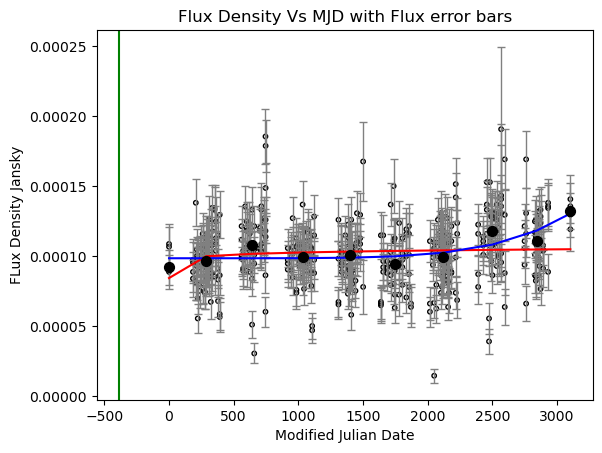

In [59]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x= 53083-st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [ ]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [ ]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
